In [42]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

p = Path(Path.cwd()).resolve().parents[2] / "introduction" / "datasets" / "Online Retail.csv"
raw_df = pd.read_csv(p)
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Data Pre-Processing

In [43]:
df = raw_df.copy()
df.info()
df.dropna(subset=['CustomerID'], inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(406829, 8)

In [44]:
int_cols = df.select_dtypes(include=['int64','float64'])


In [45]:
negative_counts = int_cols.apply(lambda x: (x <0).sum())

In [46]:
negative_counts

Quantity      8905
UnitPrice        0
CustomerID       0
dtype: int64

In [47]:
int_cols

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [48]:
cleaned_df= df[(int_cols >= 0).all(axis=1)]

In [49]:
cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [50]:
features = cleaned_df[['Quantity', 'UnitPrice']]

In [51]:
features

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [52]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Fit K-Means Model

In [13]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



#### Plot the elbow method Graph

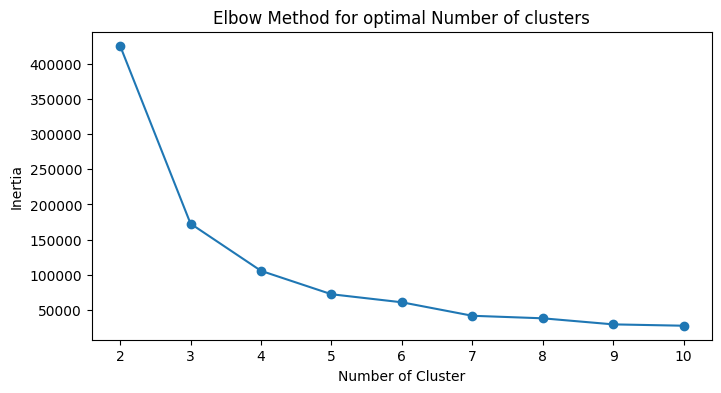

In [14]:
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal Number of clusters')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
cleaned_df['Cluster'] = kmeans.labels_

C:\Users\AjBorbz\AppData\Local\Temp\ipykernel_3764\304811081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Cluster'] = kmeans.labels_


#### Visualize the clusters

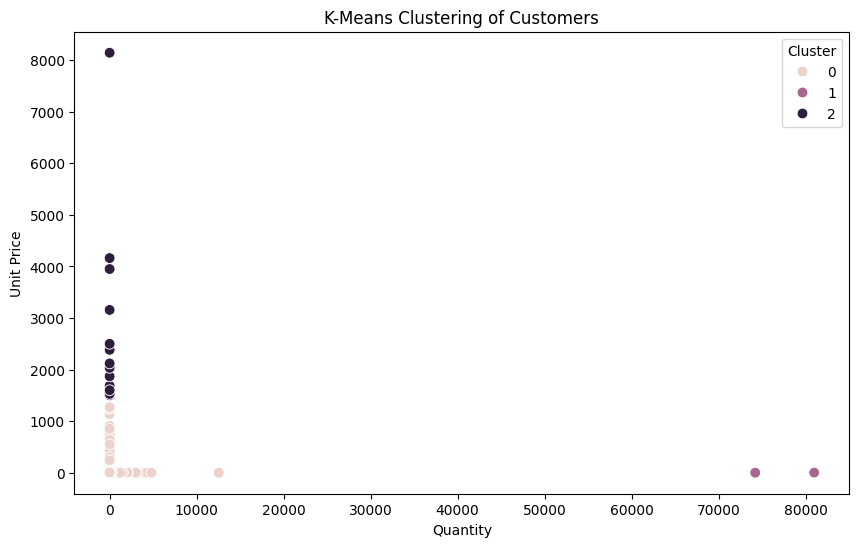

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cleaned_df, x='Quantity',
                y='UnitPrice',
                hue='Cluster',
                s=60)
plt.title("K-Means Clustering of Customers")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.legend(title="Cluster")
plt.show()

In [40]:
sample_data = scaled_features[:2000]

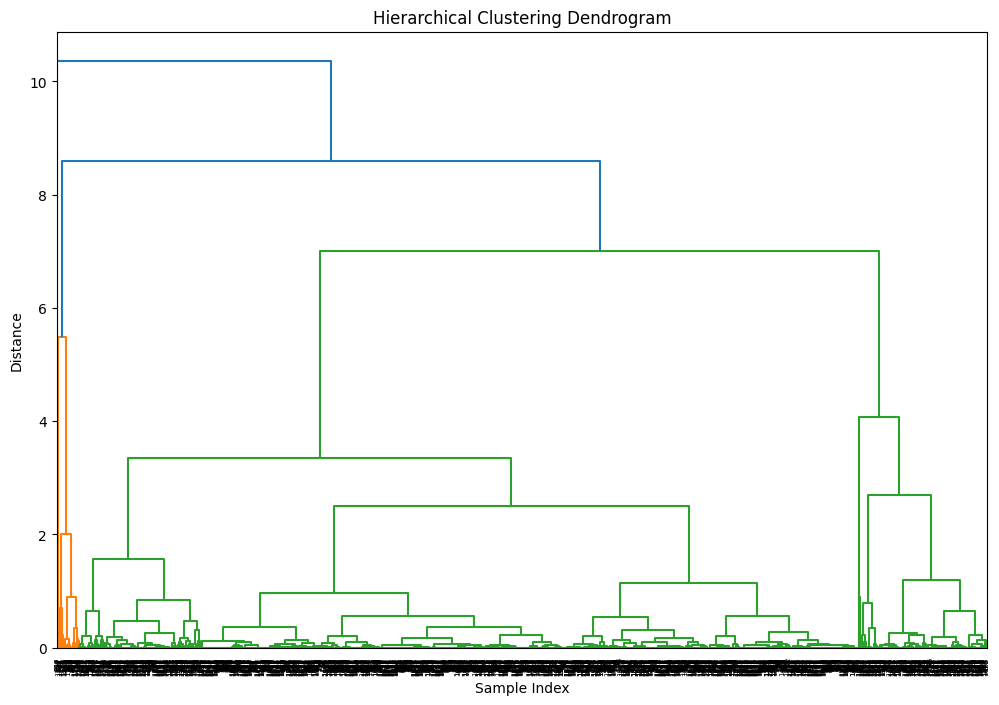

In [41]:

Z = linkage(sample_data, method="ward")
plt.figure(figsize=(12,8))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.axhline(y=15, color='r',linestyle='--')
plt.show()

In [53]:
data_sampled = scaled_features[:10000]
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [54]:
dbscan_labels = dbscan.fit_predict(data_sampled)

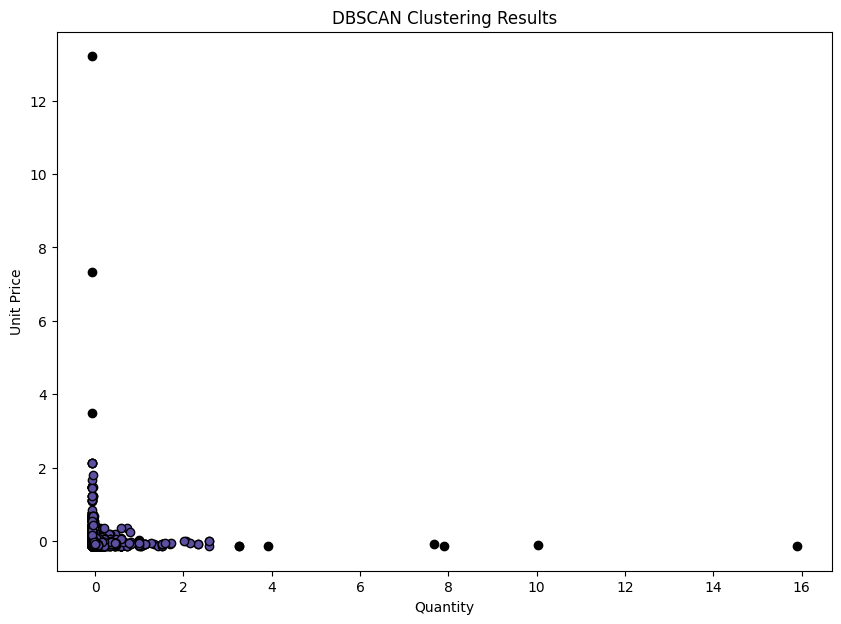

In [55]:
plt.figure(figsize=(10,7))
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_m = (dbscan_labels == k)
    xy = data_sampled[class_member_m]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=col,markeredgecolor='k',markersize=6)

plt.title("DBSCAN Clustering Results")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()

In [56]:
data = raw_df.copy()

In [57]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


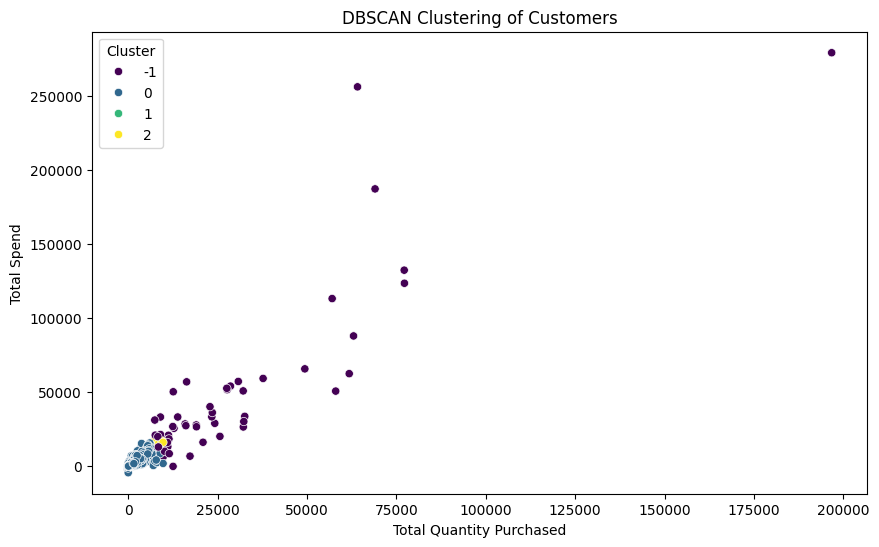

In [58]:
data = data.dropna(subset=['CustomerID'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'count', 
    'Quantity': 'sum', 
    'TotalPrice': 'sum'
}).reset_index()

customer_data.columns = ['CustomerID', 'NumTransactions', 'TotalQuantity', 'TotalSpend']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['NumTransactions', 'TotalQuantity', 'TotalSpend']])

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
customer_data['Cluster'] = db.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalQuantity', y='TotalSpend', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spend')
plt.show()